In [1]:
from experiment import evaluate_algorithm
from algorithms import (
    E00PerfectAlgorithm,
    E01SimpleAlgorithm,
    E02SimpleAlgorithmRecallingMean,
    E03ShiftedStories,
    E04LossFN,
    E05LossFNShifted,
    E06LinearRegression,
)

# E00PerfectAlgorithm
This algorithm just uses the real length and the real sizes to prove that achieving perfect score is possible. It fails two sprints likely because of the sprints whose first story contains more points than the length of the sprint itself.

Total regret: 0; Nailed Sprints 4998


count    5000.00000
mean       -0.00060
std         0.03162
min        -2.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         0.00000
Name: point_distance, dtype: float64

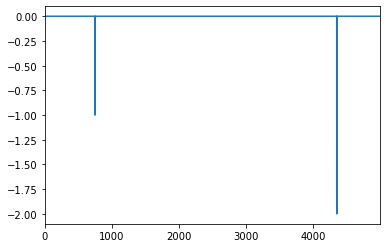

In [2]:

ev = evaluate_algorithm(E00PerfectAlgorithm)
ev.describe()

In [2]:
ev.sprints_overshoot()

2

# E01SimpleAlgorithm
The algorithm that just assumes that every person does 1 point per day and does not care about real lengths or sizes.

Total regret: 88028; Nailed Sprints 74


count    5000.000000
mean      -11.962600
std         7.839662
min       -49.000000
25%       -17.000000
50%       -11.000000
75%        -7.000000
max        14.000000
Name: point_distance, dtype: float64

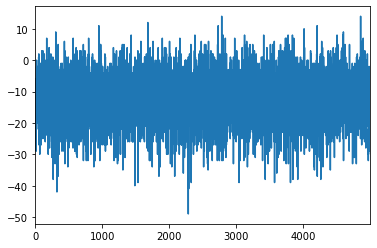

In [3]:
ev = evaluate_algorithm(E01SimpleAlgorithm)
ev.describe()

In [4]:
ev.sprints_overshoot()

4710

# E02SimpleAlgorithmRecallingMean

Total regret: 75121; Nailed Sprints 95


count    5000.000000
mean      -10.690800
std         7.779132
min       -49.000000
25%       -15.000000
50%       -10.000000
75%        -5.000000
max        15.000000
Name: point_distance, dtype: float64

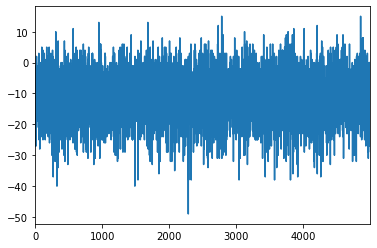

In [2]:
ev = evaluate_algorithm(E02SimpleAlgorithmRecallingMean)
ev.describe()

In [3]:
ev.sprints_overshoot()

4600

# E03ShiftedStories
Shifted stories approach shifts up the estimated sizes of the stories proportionally to their size and then estimates the length of the sprint in a similar way to that of `E02SimpleAlgorithmRecallingMean`

Total regret: 13276; Nailed Sprints 334


count    5000.000000
mean        0.053400
std         6.640344
min       -30.000000
25%        -4.000000
50%         0.000000
75%         4.000000
max        28.000000
Name: point_distance, dtype: float64

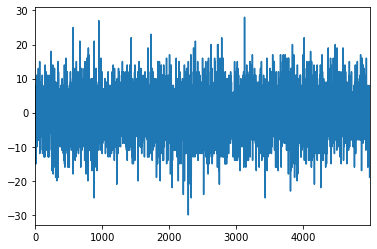

In [2]:
ev = evaluate_algorithm(E03ShiftedStories)
ev.describe()

In [3]:
ev.sprints_overshoot()

2282

# E04LossFn
This algorithm exploits the fact that the evaluator will use a regret matrix to estimate our penalisation and replicates such matrix in the decision. To minimise the regret it accepts a `regret_factor` that allows us to make the regret function more or less dramatic.

**Loss function approach with memory learning regret:**
Given that we allow a regret factor it would be great to learn its value for each sprint. To do so we come up with a bayesian estimation between what we chose in the past and what we should have chosen (the factor that would have returned exactly the length). However, this didn't work very well, 69k regret and 102 nailed sprints, mainly because of two reasons:
- We weren't including in our computations the uncertainty of the stories.
- The `estimate_length` method was unable to reach the real points in the sprint

Total regret: 13554; Nailed Sprints 272


count    5000.000000
mean        0.998400
std         6.832462
min       -33.000000
25%        -3.000000
50%         2.000000
75%         6.000000
max        26.000000
Name: point_distance, dtype: float64

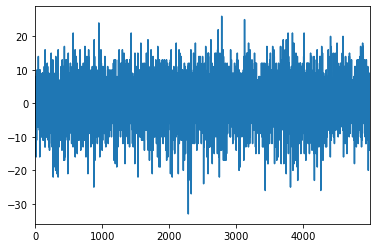

In [2]:
ev = evaluate_algorithm(E04LossFN, regret_factor=7.5)
ev.describe()

In [3]:
ev.sprints_overshoot()

1903

Total regret: 12381; Nailed Sprints 250


count    5000.000000
mean        2.038200
std         6.760021
min       -30.000000
25%        -2.000000
50%         3.000000
75%         7.000000
max        27.000000
Name: point_distance, dtype: float64

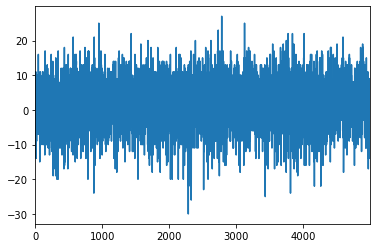

In [4]:
ev = evaluate_algorithm(E04LossFN, regret_factor=8)
ev.describe()

In [5]:
ev.sprints_overshoot()

1646

# E05LossFnShifted
Shifted stories worked rather well and also the loss function so in this algorithm we will mix both to reduce a bit more the regret.

Total regret: 13018; Nailed Sprints 331


count    5000.000000
mean        0.212800
std         6.663572
min       -29.000000
25%        -4.000000
50%         0.000000
75%         5.000000
max        29.000000
Name: point_distance, dtype: float64

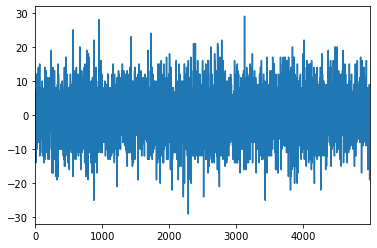

In [18]:
ev = evaluate_algorithm(E05LossFNShifted, regret_factor=.8)
ev.describe()

In [19]:
ev.sprints_overshoot()

2245

Total regret: 10814; Nailed Sprints 309


count    5000.000000
mean        2.191600
std         6.542343
min       -26.000000
25%        -2.000000
50%         2.000000
75%         6.000000
max        30.000000
Name: point_distance, dtype: float64

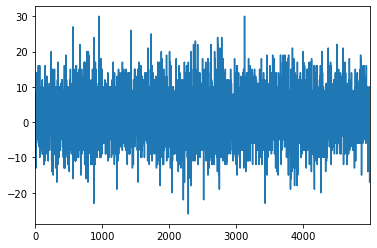

In [16]:
ev = evaluate_algorithm(E05LossFNShifted, regret_factor=1.6)
ev.describe()

In [17]:
ev.sprints_overshoot()

1632

Total regret: 10260; Nailed Sprints 237


count    5000.000000
mean        3.683800
std         6.405687
min       -21.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        31.000000
Name: point_distance, dtype: float64

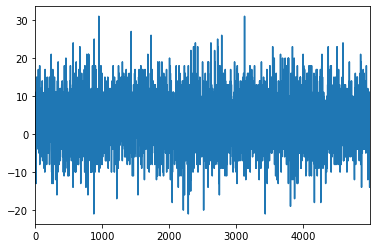

In [12]:
ev = evaluate_algorithm(E05LossFNShifted, regret_factor=2.5)
ev.describe()

In [15]:
ev.sprints_overshoot()

1247

# E06LinearRegression

Total regret: 8318; Nailed Sprints 331; Sprints overshoot 1218


count    5000.000000
mean        3.273200
std         5.631634
min       -16.000000
25%         0.000000
50%         3.000000
75%         7.000000
max        23.000000
Name: point_distance, dtype: float64

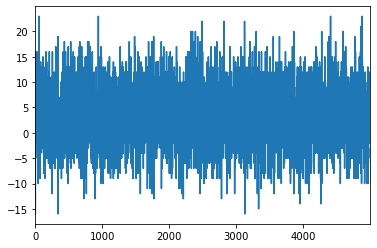

In [2]:
ev = evaluate_algorithm(E06LinearRegression)
ev.describe()